In [ ]:
from google.colab import files
uploaded = files.upload()

Saving churn.csv to churn.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier

In [ ]:
churn_df = pd.read_csv('churn.csv')

In [ ]:
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
churn_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


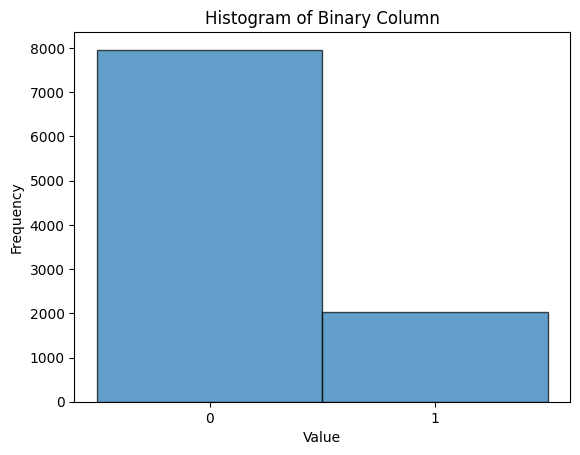

In [ ]:
unique_values = churn_df['Exited'].unique()
bins = np.arange(len(unique_values) + 1) - 0.5
plt.hist(churn_df['Exited'], bins=bins, edgecolor='black', alpha=0.7)
plt.xticks(unique_values)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Binary Column')
plt.show()

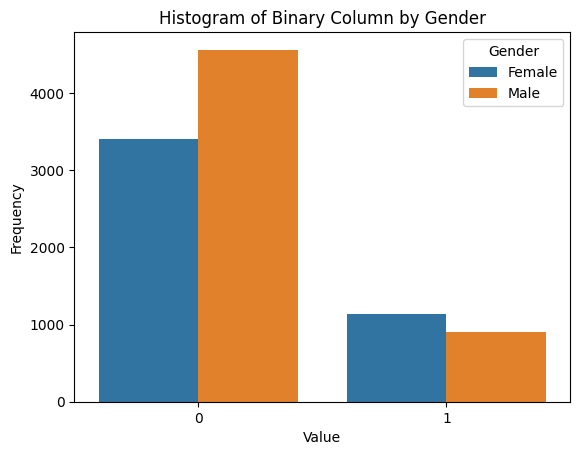

In [ ]:
sns.countplot(data=churn_df, x='Exited', hue='Gender')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Binary Column by Gender')
plt.show()

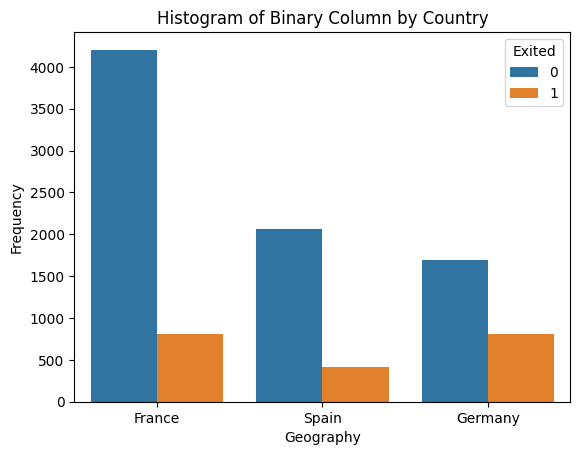

In [ ]:
sns.countplot(data=churn_df, x='Geography', hue='Exited')
plt.ylabel('Frequency')
plt.title('Histogram of Binary Column by Country')
plt.show()

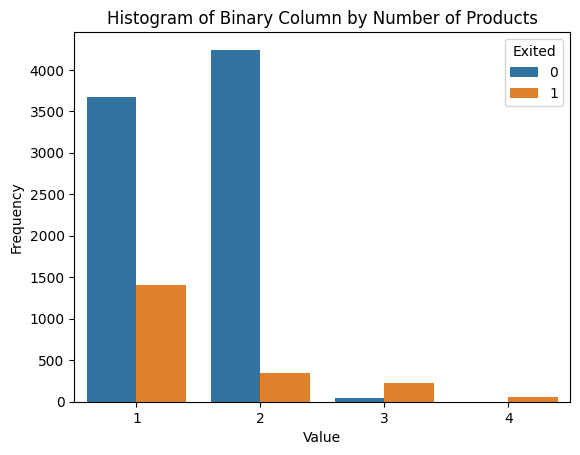

In [ ]:
sns.countplot(data=churn_df, x='NumOfProducts', hue='Exited')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Binary Column by Number of Products')
plt.show()

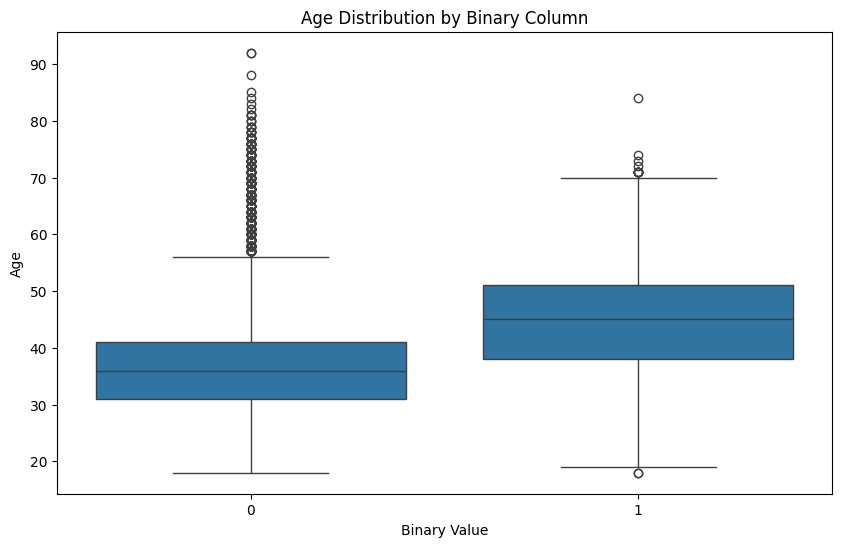

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=churn_df, x='Exited', y='Age')
plt.xlabel('Binary Value')
plt.ylabel('Age')
plt.title('Age Distribution by Binary Column')
plt.show()

In [ ]:
churn_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
churn_df.drop(['RowNumber','Surname','CustomerId'],axis=1,inplace=True)

In [ ]:
churn_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'Gender' column
churn_df['Gender'] = label_encoder.fit_transform(churn_df['Gender'])
churn_df['Geography'] = label_encoder.fit_transform(churn_df['Geography'])

In [ ]:
from imblearn.over_sampling import SMOTE
X = churn_df.drop('Exited', axis=1)
y = churn_df['Exited']

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new dataframe with resampled data (optional)
churn_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Exited'])], axis=1)

# Check the class distribution after SMOTE
print("After SMOTE:")
print(churn_df['Exited'].value_counts())

After SMOTE:
Exited
1    7963
0    7963
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Sample function to remove outliers based on IQR
def remove_outliers(df, columns):
    df_out = df.copy()
    for column in columns:
        print(column)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_out = df_out.loc[(df_out[column] >= lower_bound) & (df_out[column] <= upper_bound)]
    return df_out

# Example usage with your specified columns and dataframe
columns_to_filter = ['Age', 'NumOfProducts', 'CreditScore']

# Assuming churn_df is your dataframe
# df_filtered will contain churn_df with outliers removed from specified columns
df_filtered = remove_outliers(churn_df, columns_to_filter)


Age
NumOfProducts
CreditScore


In [ ]:
df_filtered

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.000000,1,1,1,101348.880000,1
1,608,2,0,41,1,83807.860000,1,0,1,112542.580000,0
2,502,0,0,42,8,159660.800000,3,1,0,113931.570000,1
3,699,0,0,39,1,0.000000,2,0,0,93826.630000,0
4,850,2,0,43,2,125510.820000,1,1,1,79084.100000,0
...,...,...,...,...,...,...,...,...,...,...,...
15921,773,1,0,47,5,108732.431561,1,1,0,184555.335538,1
15922,465,1,0,56,7,127070.846317,1,1,0,51834.800300,1
15923,603,1,0,32,3,102755.340078,2,0,0,189755.014496,1
15924,732,0,0,47,5,0.000000,3,1,0,89933.242727,1


In [ ]:
df_filtered

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.000000,1,1,1,101348.880000,1
1,608,2,0,41,1,83807.860000,1,0,1,112542.580000,0
2,502,0,0,42,8,159660.800000,3,1,0,113931.570000,1
3,699,0,0,39,1,0.000000,2,0,0,93826.630000,0
4,850,2,0,43,2,125510.820000,1,1,1,79084.100000,0
...,...,...,...,...,...,...,...,...,...,...,...
15921,773,1,0,47,5,108732.431561,1,1,0,184555.335538,1
15922,465,1,0,56,7,127070.846317,1,1,0,51834.800300,1
15923,603,1,0,32,3,102755.340078,2,0,0,189755.014496,1
15924,732,0,0,47,5,0.000000,3,1,0,89933.242727,1


In [ ]:
corr_matrix = df_filtered.corr()
corr_matrix

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.015636,0.003552,-0.023264,0.011923,0.012348,0.007874,0.000252,0.017250,-0.023724,-0.022822
Geography,0.015636,1.000000,0.042706,-0.030077,0.008192,0.054618,0.034108,0.013382,0.046049,-0.005552,-0.073979
Gender,0.003552,0.042706,1.000000,-0.139997,0.041573,-0.023777,0.080605,0.081937,0.152064,-0.012718,-0.331005
Age,-0.023264,-0.030077,-0.139997,1.000000,-0.048023,0.044731,-0.121352,-0.080279,-0.100659,-0.003130,0.423035
Tenure,0.011923,0.008192,0.041573,-0.048023,1.000000,0.000811,0.035667,0.032672,0.009191,0.027413,-0.075189
Balance,0.012348,0.054618,-0.023777,0.044731,0.000811,1.000000,-0.246810,-0.021481,-0.053130,0.007475,0.148489
NumOfProducts,0.007874,0.034108,0.080605,-0.121352,0.035667,-0.246810,1.000000,0.045447,0.110479,0.015897,-0.242670
HasCrCard,0.000252,0.013382,0.081937,-0.080279,0.032672,-0.021481,0.045447,1.000000,0.067935,-0.020331,-0.171495
IsActiveMember,0.017250,0.046049,0.152064,-0.100659,0.009191,-0.053130,0.110479,0.067935,1.000000,-0.016136,-0.376356
EstimatedSalary,-0.023724,-0.005552,-0.012718,-0.003130,0.027413,0.007475,0.015897,-0.020331,-0.016136,1.000000,0.010672


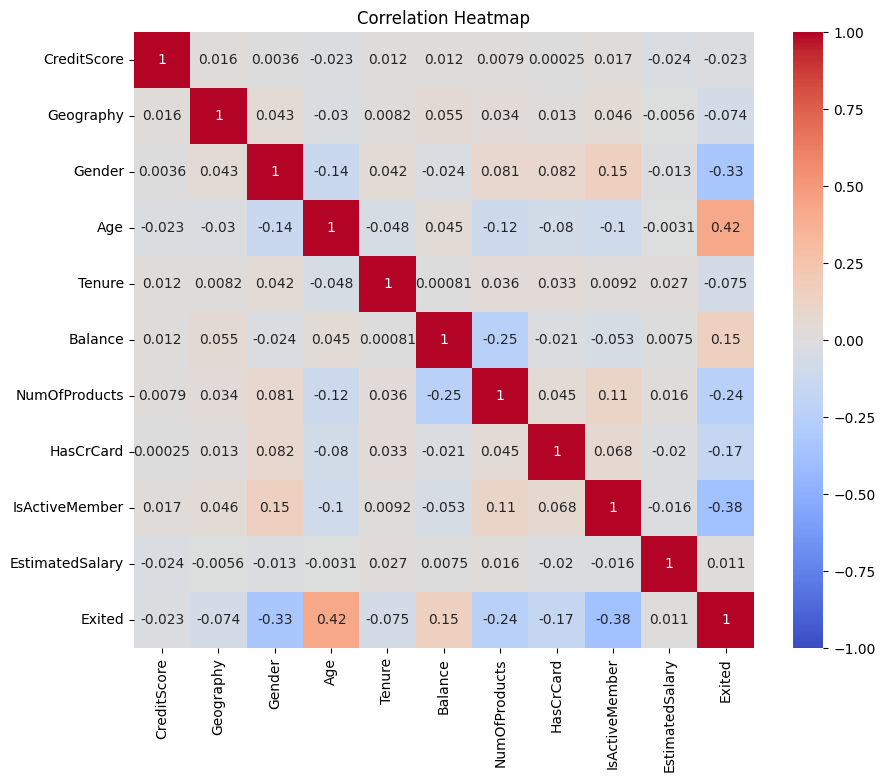

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df_filtered['Exited'].value_counts()

Exited
1    7813
0    7762
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
columns_to_scale = ['CreditScore', 'Balance', 'EstimatedSalary']   # Replace with actual column names

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale selected columns
churn_df_scaled = churn_df.copy()  # Make a copy to preserve the original data
churn_df_scaled[columns_to_scale] = scaler.fit_transform(churn_df_scaled[columns_to_scale])

# Display the scaled DataFrame
print(churn_df_scaled.head())

   CreditScore  Geography  Gender  Age  Tenure   Balance  NumOfProducts  \
0        0.538          0       0   42       2  0.000000              1   
1        0.516          2       0   41       1  0.334031              1   
2        0.304          0       0   42       8  0.636357              3   
3        0.698          0       0   39       1  0.000000              2   
4        1.000          2       0   43       2  0.500246              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1         0.506735       1  
1          0               1         0.562709       0  
2          1               0         0.569654       1  
3          0               0         0.469120       0  
4          1               1         0.395400       0  


In [ ]:
X = churn_df_scaled.drop('Exited', axis=1)
y = churn_df_scaled['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy score of Decision Tree Classifier: ", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1633
           1       0.78      0.82      0.80      1553

    accuracy                           0.80      3186
   macro avg       0.80      0.80      0.80      3186
weighted avg       0.80      0.80      0.80      3186

Accuracy score of Decision Tree Classifier:  0.7984934086629002


In [ ]:
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy score of Random Forest Classifier: ", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1633
           1       0.85      0.87      0.86      1553

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186

Accuracy score of Random Forest Classifier:  0.8631512868801005


In [ ]:
knn_classifier = KNeighborsClassifier()

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy score of K-Nearest Neighbors Classifier: ", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1633
           1       0.79      0.81      0.80      1553

    accuracy                           0.80      3186
   macro avg       0.80      0.80      0.80      3186
weighted avg       0.80      0.80      0.80      3186

Accuracy score of K-Nearest Neighbors Classifier:  0.8000627746390458


In [ ]:
dt_param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV with 5-fold cross-validation
dt_grid_search = GridSearchCV(estimator=dt_classifier, param_grid=dt_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Train the classifier with cross-validation and hyperparameter tuning
dt_grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_dt_params = dt_grid_search.best_params_
best_dt_classifier = dt_grid_search.best_estimator_

print("Best Parameters for Decision Tree: ", best_dt_params)

# Evaluate the best Decision Tree classifier
y_pred_dt = best_dt_classifier.predict(X_test)
print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy score of Decision Tree with Hyperparameter Tuning: ", accuracy_score(y_test, y_pred_dt))

Best Parameters for Decision Tree:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5}
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1633
           1       0.80      0.81      0.80      1553

    accuracy                           0.81      3186
   macro avg       0.81      0.81      0.81      3186
weighted avg       0.81      0.81      0.81      3186

Accuracy score of Decision Tree with Hyperparameter Tuning:  0.8063402385436284


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [ ]:
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize GridSearchCV with 5-fold cross-validation
knn_grid_search = GridSearchCV(estimator=knn_classifier, param_grid=knn_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Train the classifier with cross-validation and hyperparameter tuning
knn_grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_knn_params = knn_grid_search.best_params_
best_knn_classifier = knn_grid_search.best_estimator_

print("Best Parameters for K-Nearest Neighbors: ", best_knn_params)

# Evaluate the best KNN classifier
y_pred_knn = best_knn_classifier.predict(X_test)
print("Classification Report for K-Nearest Neighbors:")
print(classification_report(y_test, y_pred_knn))
print("Accuracy score of K-Nearest Neighbors with Hyperparameter Tuning: ", accuracy_score(y_test, y_pred_knn))

Best Parameters for K-Nearest Neighbors:  {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1633
           1       0.80      0.83      0.81      1553

    accuracy                           0.81      3186
   macro avg       0.81      0.81      0.81      3186
weighted avg       0.81      0.81      0.81      3186

Accuracy score of K-Nearest Neighbors with Hyperparameter Tuning:  0.8129315756434401


In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [30, 50, 70],      # Number of trees in the forest
    'max_depth': [None, 10, 20],       # Maximum depth of the trees
    'min_samples_split': [2, 5],       # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required to be a leaf node
    'max_features': ['auto'],     # Number of features to consider when looking for the best split
    'criterion': ['gini', 'entropy']      # Function to measure the quality of a split
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Train the classifier with cross-validation and hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_rf_classifier = grid_search.best_estimator_

# Evaluate the classifier on the test set
y_pred = best_rf_classifier.predict(X_test)

print("Best Parameters for Random Forest: ", best_params)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy score of Random Forest with Hyperparameter Tuning: ", accuracy_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters for Random Forest:  {'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 70}
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1633
           1       0.85      0.87      0.86      1553

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186

Accuracy score of Random Forest with Hyperparameter Tuning:  0.8606403013182674
